# Predictive Maintenance EDA Notebook

## Overview:
This notebook aims to explore and analyze the AI4I 2020 Predictive Maintenance Dataset for predictive maintenance tasks. The dataset contains information about a synthetic milling process, including various operational parameters and machine failure indicators. The primary objectives of this analysis are to understand the data's characteristics, identify patterns and relationships, and prepare the data for machine learning modeling.

## Problem Statement:
Machines are critical assets in modern industries, and ensuring their optimal performance is crucial for business operations. Traditional maintenance strategies often lead to unplanned downtime and increased costs. Predictive maintenance offers a proactive approach to address these challenges by leveraging machine learning techniques to monitor, predict, and prevent machine failures. In this project, we aim to develop machine learning models for predictive maintenance in response to Industry 4.0 initiatives. Specifically, we focus on two supervised learning tasks:

- Failure Prediction (Binary Classification): Predict whether a machine failure will occur.
- Type of Failure Detection (Multi-class Classification): Determine the type of failure based on operational parameters.
  
## Dataset Information:
- Dataset Name: AI4I 2020 Predictive Maintenance Dataset
- Source: UCI Machine Learning Repository
- DOI: https://doi.org/10.24432/C5HS5C
- Description: The dataset contains 10000 records of a synthetic milling process, with columns including operational parameters (e.g., air temperature, process temperature, rotational speed, torque, tool wear) and machine failure indicators (binary and multi-class). The goal is to utilize this dataset for building predictive maintenance models.
## Tasks:
- Explore the data distribution, summary statistics, and correlations.
- Visualize relationships between features and machine failures.
- Identify any missing values or anomalies in the dataset.
- Preprocess the data for machine learning modeling.
## Tools and Libraries:
- Python 3.x
- Jupyter Notebook
- Pandas
- NumPy
- Matplotlib
- Seaborn

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import plotly.express as px

In [2]:
# read and import file
df = pd.read_csv(r"C:\Users\USER\Documents\Python Scripts\Machine learning\Neural networks\Predictive Maintenance\predictive-maintenance-supervised-learning\data\ai4i2020.csv")
df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


## Inspecting data's basic informatiom

In [11]:
# shape and size of data
display(df.shape)
display(df.size)

(10000, 14)

140000

In [8]:
# data types of each column
df.dtypes

UDI                          int64
Product ID                  object
Type                        object
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Machine failure              int64
TWF                          int64
HDF                          int64
PWF                          int64
OSF                          int64
RNF                          int64
dtype: object

In [12]:
# info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [13]:
# check for duplicates
df.duplicated().sum()

0

- There are no duplicate records in the dataset

In [14]:
# check for missing values
df.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

* There are no missing values in this dataset

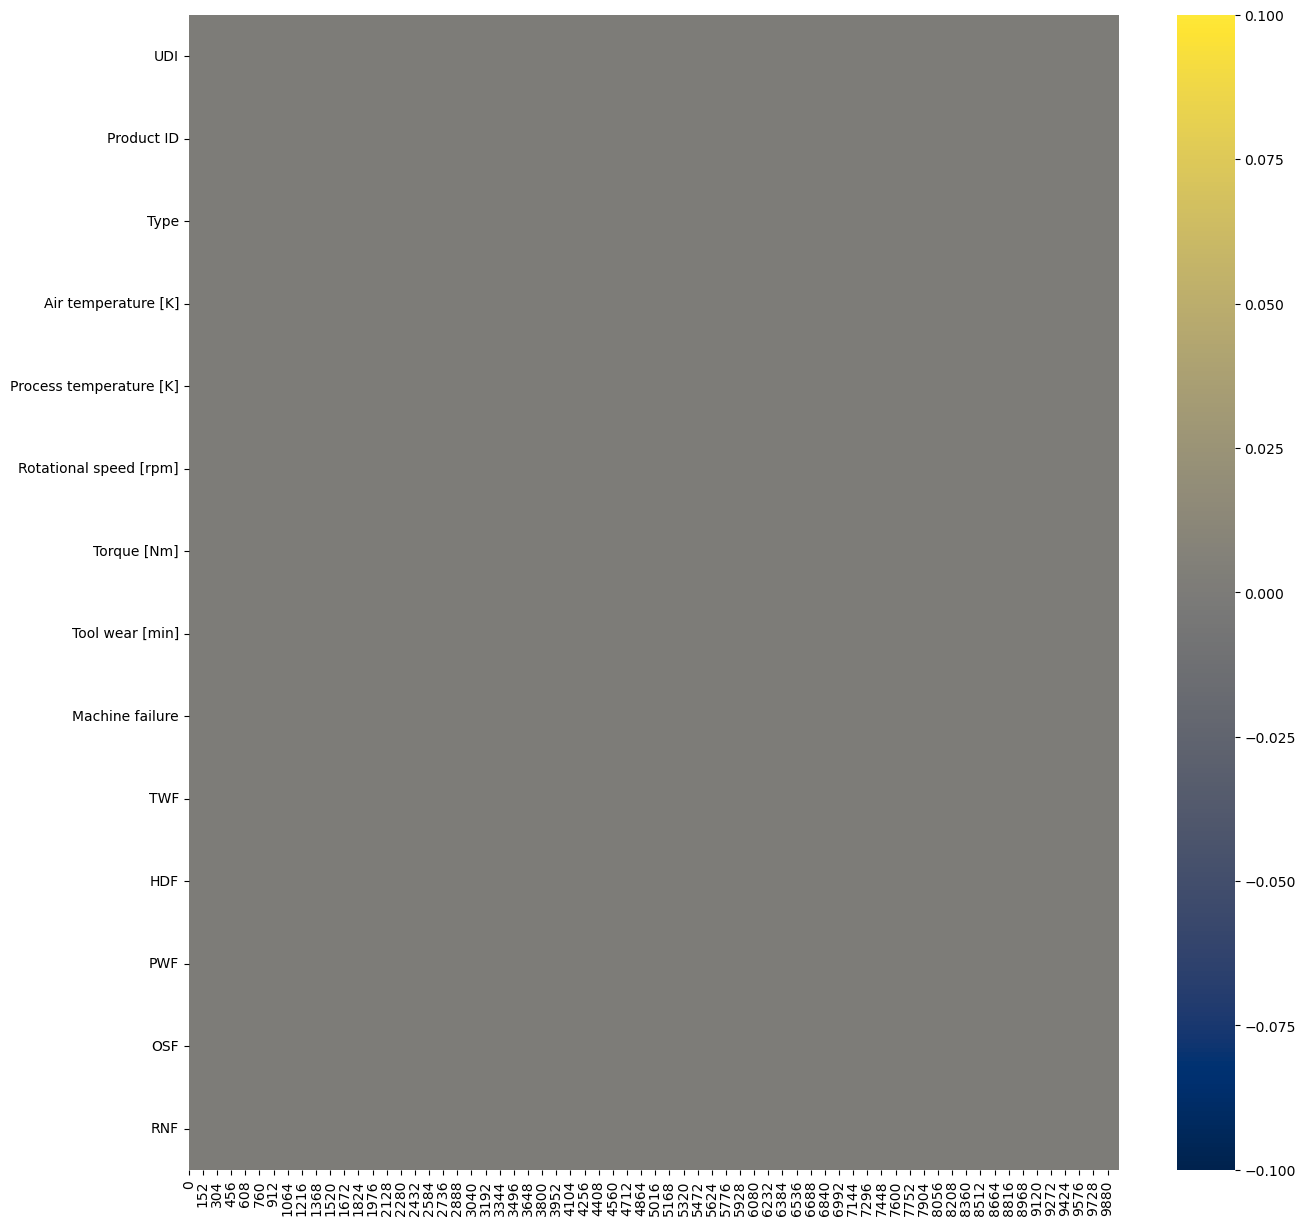

In [15]:
#plot to verify no missing values 
plt.figure(figsize=(15,15))
plot_kws={"s": 1}
sns.heatmap(df.isna().transpose(),
            cmap='cividis',
            linewidths=0.0,
           ).set_facecolor('white')

In [16]:
# summary statistics of the data
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000
